## Matplotlib


### 시각화가 필요한 이유
1. 많은 양의 데이터를 한눈에 볼 수 있다.
2. 인사이트를 뽑아낼 수 있다.(차트, 그래프, 통계 서비스 등)
3. 타인의 설득 도구가 된다.
4. 데이터 기반의 의사결정에 도움을 준다.


### Matplotlib 특징
<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="matplotlib" width="60%" height="70%">

- title
- x label, y label
- legend

In [1]:
%pip install matplotlib

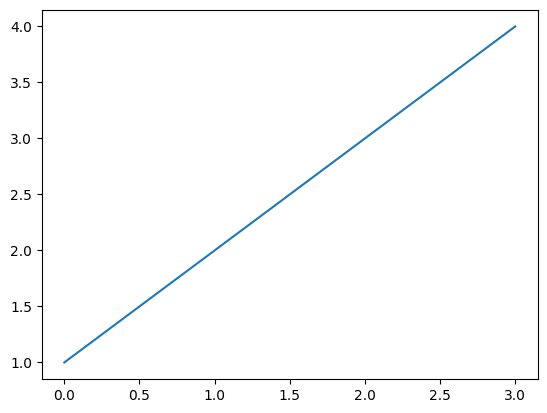

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4]) # y값 1,2,3,4로 증가

(-1.0, 1.0)

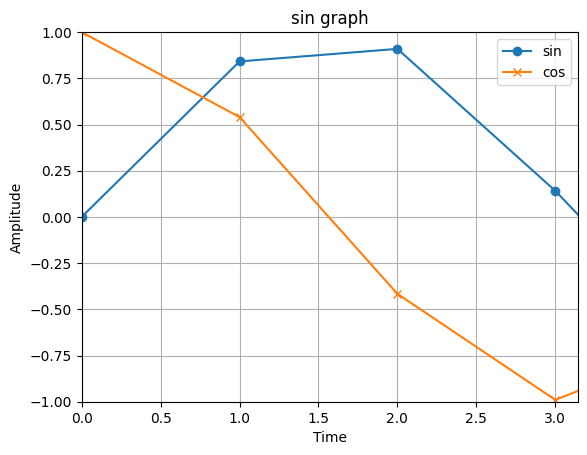

In [3]:
import numpy as np

x = np.arange(0,12,1) # x 축의 값이 0부터 12까지 0.1간격
y = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y, label="sin", marker="o")
plt.plot(x,y2, label="cos", marker="x")
plt.legend()
# plt.legend(loc=(1,1)) # 범례의 위치 지정

plt.title("sin graph") # 그래프의 제목
plt.xlabel("Time") # 그래프의 x라벨
plt.ylabel("Amplitude") # 그래프의 y라벨
plt.grid() # 그래프 내 그리드(격자) 생성

# limit 값 : 이 값에따라 화면에 그려질 그래프의 x축과 y축의 제한값이 생김
plt.xlim(0, np.pi) # 0부터 파이값까지
plt.ylim(-1, 1) # -1부터 1까지

In [4]:
# 한글 폰트 적용 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
# 영화데이터 시각화
import pandas as pd

json_data = {
  "columns": ["Movie", "Release Year", "Audience", "Rating"],
  "index": [0, 1, 2, 3, 4, 5, 6, 7],
  "data": [
    ["Avengers", 2012, 1500, 8.8],
    ["Interstellar", 2014, 1100, 9.1],
    ["Frozen", 2013, 1020, 8.5],
    ["About Time", 2013, 950, 8.7],
    ["The Dark Knight", 2008, 1300, 9.0],
    ["Inception", 2010, 1200, 8.8],
    ["La La Land", 2016, 800, 8.6],
    ["Toy Story", 2010, 980, 8.5]
  ]
}

# JSON 데이터를 DataFrame으로 변환
df = pd.DataFrame(json_data['data'], columns=json_data['columns'])
df

,Movie,Release Year,Audience,Rating
0,Avengers,2012,1500,8.8
1,Interstellar,2014,1100,9.1
2,Frozen,2013,1020,8.5
3,About Time,2013,950,8.7
4,The Dark Knight,2008,1300,9.0
5,Inception,2010,1200,8.8
6,La La Land,2016,800,8.6
7,Toy Story,2010,980,8.5


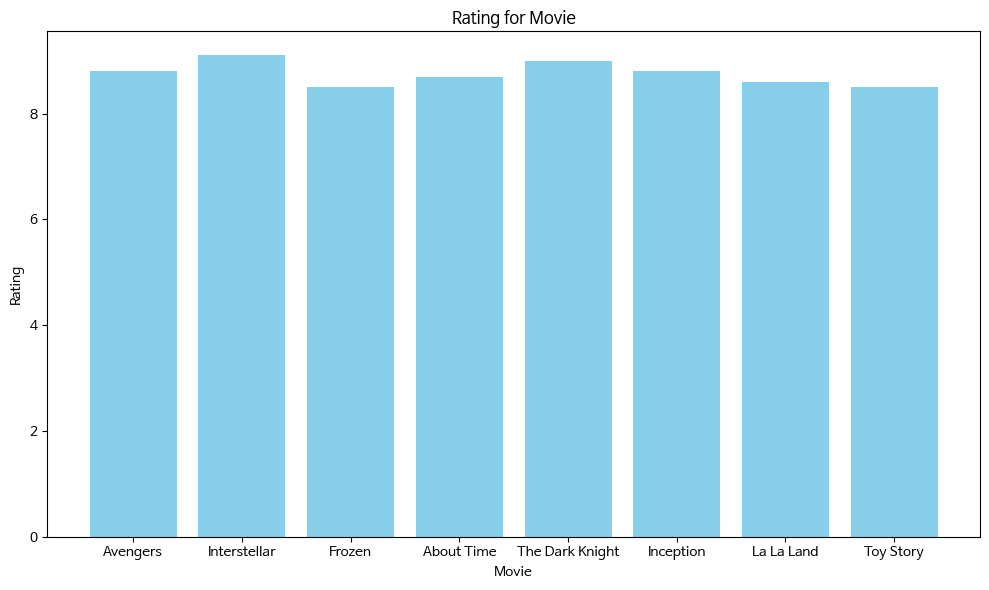

In [12]:
# 1. 영화 데이터를 활용하여 x 축은 Movie y축은 Rating인 막대(bar) 그래프를 만드시오.

import matplotlib.pyplot as plt

# 데이터 준비
movies = df['Movie']
ratings = df['Rating']

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(movies, ratings, color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('Rating for Movie')
plt.xlabel('Movie')
plt.ylabel('Rating')

# 그래프 표시
plt.tight_layout()
plt.show()


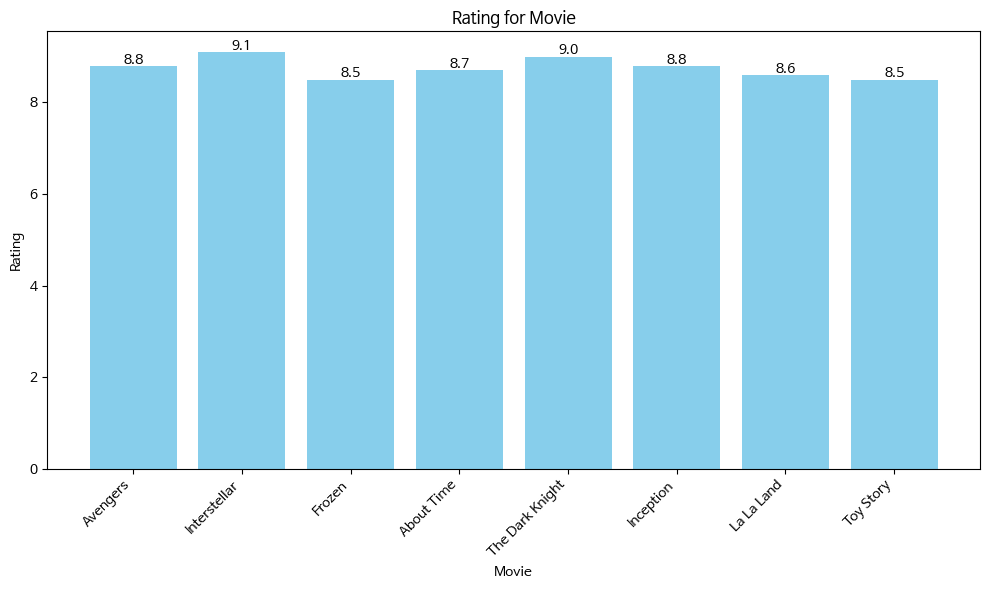

In [7]:
# 2. 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오.
# 제목: Movie Night Top5
# x축: label: Movie (90도 회전)
# y축: label: Rating

# 데이터 준비
movies = df['Movie']
ratings = df['Rating']

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(movies, ratings, color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('Movie Night Top5')
plt.xlabel('Movie')
plt.ylabel('Rating')

# x 축 라벨들이 겹치지 않도록 설정
plt.xticks(rotation=45, ha='right')

# 막대 그래프 위에 평점 값 표시
for bar, rating in zip(bars, ratings):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(rating), ha='center', color='black', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.show()

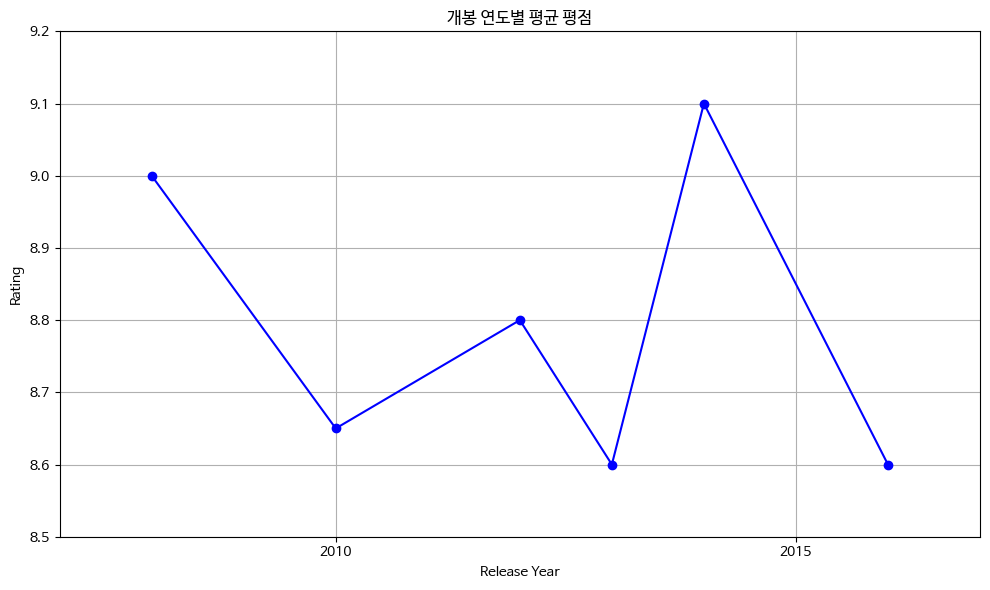

In [19]:
# 데이터 준비
release_years = df['Release Year']
ratings = df['Rating']

# 개봉 연도별 평균 평점 계산
mean_ratings_by_year = df.groupby('Release Year')['Rating'].mean()

# 선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(mean_ratings_by_year.index, mean_ratings_by_year.values, marker='o', color='blue', linestyle='-')

# x 축 눈금 설정
plt.xticks(range(2005, 2025, 5))

# y 축 범위 설정
plt.ylim(7, 10)

# 그래프 제목과 축 레이블 설정
plt.title('개봉 연도별 평균 평점')
plt.xlabel('Release Year')
plt.ylabel('Rating')

# 그래프 표시
plt.xlim(2007, 2017)
plt.ylim(8.5, 9.2)
plt.tight_layout()
plt.grid(True)
plt.show()

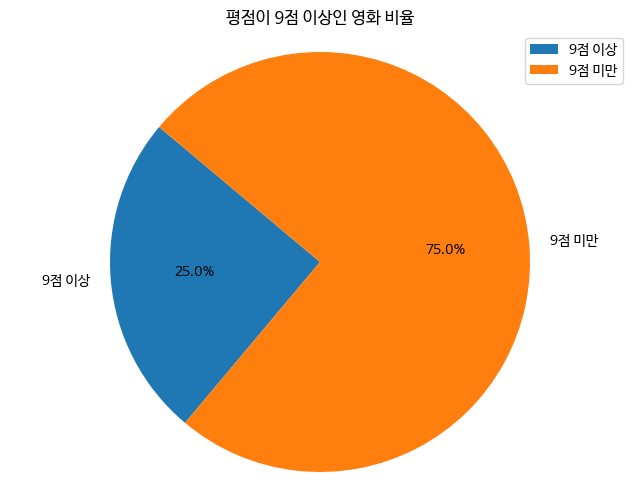

In [20]:
# 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프(파이차트)를 제시된 세부 사항을 적용하여 그리시오.

# 평점이 9점 이상인 영화 수 계산
high_ratings_count = len(df[df['Rating'] >= 9])

# 평점이 9점 미만인 영화 수 계산
low_ratings_count = len(df[df['Rating'] < 9])

# 비율 계산
total_movies = len(df)
high_ratings_percent = (high_ratings_count / total_movies) * 100
low_ratings_percent = (low_ratings_count / total_movies) * 100

# 라벨 및 비율 설정
labels = ['9점 이상', '9점 미만']
sizes = [high_ratings_percent, low_ratings_percent]

# 원 그래프(파이 차트) 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# 범례 추가
plt.legend(loc='upper right')

# 그래프 제목 설정
plt.title('평점이 9점 이상인 영화 비율')

# 그래프 표시
plt.axis('equal')
plt.show()
